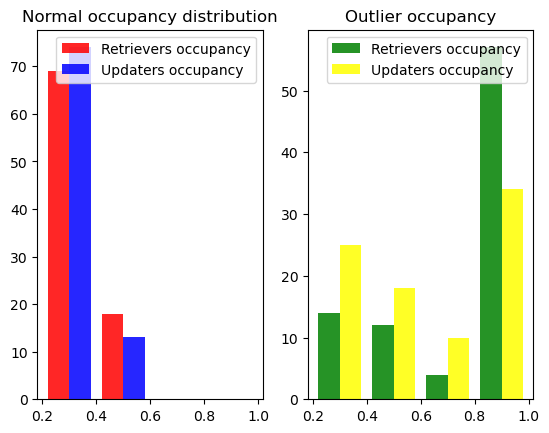

In [95]:

from matplotlib import pyplot as plt
import pandas as pd
df_normal = pd.read_csv("../dynabicChatbot/good_RESOURCES_OCCUPANCY_HACKED_False.csv")
df_outlier = pd.read_csv("../dynabicChatbot/good_RESOURCES_OCCUPANCY_HACKED_True.csv")

# plotting two histograms on the same axis 

fig, ax = plt.subplots(1,2)

ax[0].hist([df_normal['dataretrieval_occupancy'], df_normal['dataupdater_occupancy']],
         bins=[0.2, 0.4, 0.6, 0.8, 1.0], alpha=0.85, color=['red', 'blue'], label=['Retrievers occupancy', 'Updaters occupancy'])
ax[0].legend()
ax[0].set_title("Normal occupancy distribution") 

ax[1].hist([df_outlier['dataretrieval_occupancy'], df_outlier['dataupdater_occupancy']],
         bins=[0.2, 0.4, 0.6, 0.8, 1.0], alpha=0.85, color=['green', 'yellow'], label=['Retrievers occupancy', 'Updaters occupancy'])
ax[1].legend()
ax[1].set_title("Outlier occupancy")

plt.show(fig)


In [59]:
import pandas as pd
import numpy as np
from typing import Dict, Union
interested_columns = ['ip','id', 'lat', 'lon']

def show_outlier_ips_usage(normaldataset: Union[str, pd.DataFrame], outlierdataset: Union[str, pd.DataFrame])->None:
    # Create counts per usage and median values
    df_normal = pd.read_csv("../dynabicChatbot/DATASET_LOGS_HACKED_False.csv") if isinstance(normaldataset, str) else normaldataset
    df_normal = df_normal.groupby(interested_columns, as_index=False).agg(count=("ip", "count"))
    median_normal = df_normal.loc[:, 'count'].median()
    median_normal_plus = median_normal*1.3
    
    df_outliers = pd.read_csv("../dynabicChatbot/DATASET_LOGS_HACKED_True.csv") if isinstance(outlierdataset, str) else outlierdataset
    df_outliers = df_outliers[interested_columns]
    df_outliers = df_outliers.groupby(interested_columns, as_index=False).agg(count=("ip", "count"))
    
    print(f"The median normal dataset: {median_normal}, and median considered for dataset filter: {median_normal_plus}")
    
    
    # Select from dataset only what we are interested in 
    ips_which_were_highconsumers_in_past_too = df_normal.loc[np.where(df_normal["count"] > median_normal_plus)]["ip"].to_dict().values()
    #print(ips_which_were_highconsumers_in_past_too)
    
    mask_above_mean_plus = np.where((df_outliers["count"] > median_normal_plus) & ~(df_outliers["ip"].isin(ips_which_were_highconsumers_in_past_too)))
    print(f"The items above mask mean that were not high consumers in the past too are {mask_above_mean_plus}")
          
    # Filter by the mask and sort the values by usage
    df_outliers = df_outliers.loc[mask_above_mean_plus]
    df_outliers.sort_values(by=["count"], inplace=True, ascending=False)
    
    print(f"The final output is: {df_outliers}")
    

show_outlier_ips_usage("../dynabicChatbot/DATASET_LOGS_HACKED_False.csv", "../dynabicChatbot/DATASET_LOGS_HACKED_True.csv")


The median normal dataset: 42.0, and median considered for dataset filter: 54.6
The items above mask mean that were not high consumers in the past too are (array([  3,   7,   8,  18,  21,  23,  27,  29,  30,  38,  43,  44,  46,
        51,  57,  67,  70,  71,  76,  77,  82,  84,  85,  90,  93,  94,
        97,  99, 103, 108, 110, 112, 119, 121, 126, 129, 130, 131, 132,
       133, 135, 137, 138, 143, 147], dtype=int64),)
The final output is:                   ip         id        lat        lon  count
57     195.51.232.97    6_brush  44.452296  25.912814    429
27    141.160.16.151  21_flower  44.416535  26.074032    425
3       108.0.111.97  12_kettle  44.373662  26.115235    423
43    167.202.212.21    2_brush  44.404685  26.080729    420
21     138.205.78.16   16_brush  44.426751  25.998371    411
38    160.160.77.196   3_kettle  44.586022  26.180886    411
143   80.193.135.252   1_flower  44.492869  26.256445    409
82    231.201.155.38   9_kettle  44.337298  25.962912    409
44   

In [12]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                               'Parrot', 'Parrot'],
                    'Max Speed': [380., 390., 24., 24.]})
#df.groupby(['Animal']).count().reset_index()


df.groupby(["Animal"], as_index=False).agg(count=("Animal", "count"))

,Animal,count
0,Falcon,2
1,Parrot,2


In [9]:
from userUtils import SecurityOfficer
import userUtils
import pandas as pd
from databaseUtils import *
from typing import Union


In [10]:
# Create sample
cdb = CredentialsDB()
cdb.create_credentials_dataset()

True

In [11]:
# Clear save sample
cdb.clear_credentials_dataset()
cdb.save_credentials_dataset('data/credentials.csv')

In [12]:
# Load sample
cdb.load_credentials_dataset()

import pdb
#pdb.set_trace()
print(cdb)

FileNotFoundError: [Errno 2] No such file or directory: 'data/cached_credentials.csv'

In [5]:
# insert sample
from typing import Union

a = SecurityOfficer()
a.username = "alin"
cdb.insertNewUser(a)

b = SecurityOfficer()
b.username = "ciprian"
b.expertise = userUtils.SecurityOfficerExpertise.ADVANCED
cdb.insertNewUser(b)

print(cdb)

# import datetime
# 
# data = {'name':'Ciprian Paduraru', 
#         'username' : 'paduraru2009',
#         'password' : 'Arbori2009',
#         'birthday' : datetime.datetime(1986, 9, 3),
#         'expertise':2, 
#         'preference':1, 
#         'politely':2, 
#         'emojis':1, 
#         'motivation_factor':0.2, 
#         'can_be_tricked_out_factor':0.0, 
#         'intentional_damage_factor':0.5, 
#         'correct_teamwork':0.5}
# 
# 
# 
# df.loc[len(df.index)] = data
# 
# save_credentials_dataset(df, 'data/credentials.csv')

  name username password                   birthday  \
0          alin          2023-12-29 10:12:36.152455   
1       ciprian          2023-12-29 10:12:36.153457   

                           expertise                        preference  \
0  SecurityOfficerExpertise.BEGINNER  Preference_ResponseType.DETAILED   
1  SecurityOfficerExpertise.ADVANCED  Preference_ResponseType.DETAILED   

                                  politely                        emojis  \
0  Preference_Politely.POLITE_PRESENTATION  Preference_Emojis.USE_EMOJIS   
1  Preference_Politely.POLITE_PRESENTATION  Preference_Emojis.USE_EMOJIS   

   motivation_factor  can_be_tricked_out_factor  intentional_damage_factor  \
0                1.0                        0.0                        0.0   
1                1.0                        0.0                        0.0   

   correct_teamwork  
0               1.0  
1               1.0  


In [6]:
# Print sample
print(cdb)


  name username password                   birthday  \
0          alin          2023-12-29 10:12:36.152455   
1       ciprian          2023-12-29 10:12:36.153457   

                           expertise                        preference  \
0  SecurityOfficerExpertise.BEGINNER  Preference_ResponseType.DETAILED   
1  SecurityOfficerExpertise.ADVANCED  Preference_ResponseType.DETAILED   

                                  politely                        emojis  \
0  Preference_Politely.POLITE_PRESENTATION  Preference_Emojis.USE_EMOJIS   
1  Preference_Politely.POLITE_PRESENTATION  Preference_Emojis.USE_EMOJIS   

   motivation_factor  can_be_tricked_out_factor  intentional_damage_factor  \
0                1.0                        0.0                        0.0   
1                1.0                        0.0                        0.0   

   correct_teamwork  
0               1.0  
1               1.0  


In [9]:
                
print(cdb.getUserById("paduraru2009"))
print(cdb.getUserById("alin"))
print(cdb.getUserById("ciprian"))

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'